# Toronto Dwellings Analysis Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions to create a Panel dashboard.

In [246]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from dotenv import load_dotenv

In [247]:
# Initialize the Panel Extensions (for Plotly)
import panel as pn
pn.extension("plotly")

In [248]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")
px.set_mapbox_access_token(map_box_api)

# Import Data

In [249]:
ls

dashboard_WC.ipynb                      toronto_neighbourhoods_census_data.csv
dwelling_types_per_year.csv             toronto_neighbourhoods_coordinates.csv
rental_analysis_WC.ipynb


In [250]:
# Import the CSVs to Pandas DataFrames
to_data = pd.read_csv('toronto_neighbourhoods_census_data.csv', index_col="year")
df_neighbourhood_locations = pd.read_csv("toronto_neighbourhoods_coordinates.csv")

- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

### Global available data

In [293]:
# Getting the data from the top 10 expensive neighbourhoods

top_10 = to_data.groupby('neighbourhood').mean().nlargest(10, columns='average_house_value').reset_index()

# Calculate the mean number of dwelling types units per year

to_data_year = to_data[['single_detached_house', 'apartment_five_storeys_plus', 'movable_dwelling', 'semi_detached_house'
                        ,'row_house', 'duplex', 'apartment_five_storeys_less', 'other_house']].groupby('year').mean()

# Calculate the average monthly shelter costs for owned and rented dwellings

avg_shelter_costs = to_data[['shelter_costs_owned', 'shelter_costs_rented']].groupby('year').mean()

all_neighboorhood = to_data[['neighbourhood','single_detached_house', 'apartment_five_storeys_plus', 'movable_dwelling', 'semi_detached_house'
                            ,'row_house', 'duplex', 'apartment_five_storeys_less', 'other_house','average_house_value','shelter_costs_owned',
                            'shelter_costs_rented']].groupby('neighbourhood').mean()
all_neighboorhood = all_neighboorhood.reset_index()
combined_df = pd.concat([df_neighbourhood_locations.set_index('neighbourhood'),all_neighboorhood.set_index('neighbourhood')], join ='inner', axis=1).reset_index()

# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("map_box_api")

# Set the Mapbox API
px.set_mapbox_access_token(map_box_api)

### Panel Visualization Functions

In [323]:
# Define Panel visualization functions
def neighbourhood_map():
    """Neighbourhood Map"""
   
    map_plot = px.scatter_mapbox (
    combined_df,
    lat = "lat",
    lon = "lon",
    color = "average_house_value",
    hover_data = ['lat','lon','single_detached_house','apartment_five_storeys_plus','movable_dwelling','semi_detached_house',
                 'row_house','duplex','apartment_five_storeys_less','other_house','average_house_value','shelter_costs_owned','shelter_costs_rented'],
    zoom = 10,
    hover_name = 'neighbourhood'
    )
    
    return map_plot

def create_bar_chart(data, title, xlabel, ylabel, color):
    """Create a barplot based in the data argument."""
    
    bar_chart = data.hvplot.bar(title=title, xlabel=xlabel, ylabel=ylabel, color=color, rot=90)
    return bar_chart

def create_line_chart(data, title, xlabel, ylabel, color):
    """Create a line chart based in the data argument."""
    
    fig = plt.figure()
    line_chart = data.plot(color=color)
    line_chart.set_xlabel(xlabel, fontsize=12)
    line_chart.set_ylabel(ylabel, fontsize=12)
    line_chart.set_title(title, fontsize=14, fontweight="bold")    
    plt.close(fig)

    return pn.pane.Matplotlib(fig, tight=True)

def average_house_value():
    """Average house values per year."""
    
    avg_house_val = to_data[['average_house_value']].groupby('year').mean()
    avg_house_val = avg_house_val.reset_index().hvplot.line(x='year', y = 'average_house_value', title='Average House Value in Toronto', color='blue', figsize=(8,4))
    return avg_house_val

def average_value_by_neighbourhood():
    """Average house values by neighbourhood."""
    
    to_data_index = to_data.reset_index()
    to_data_index = to_data_index[['year','neighbourhood','average_house_value']]
    avg_house_val_neighborhood = to_data_index.hvplot(kind='line', x='year', y='average_house_value', width=600,groupby='neighbourhood')
    return avg_house_val_neighborhood

def number_dwelling_types():
    """Number of dwelling types per year"""
    
    all_dwellings_types_per_year = to_data[['neighbourhood','single_detached_house', 'apartment_five_storeys_plus', 'movable_dwelling', 'semi_detached_house'
                        ,'row_house', 'duplex', 'apartment_five_storeys_less', 'other_house']].reset_index()
    all_dwellings_types_per_year = all_dwellings_types_per_year.hvplot(kind='bar', width=600, height=500, x='year', xlabel= 'Year', ylabel= 'Dwelling Type Units', groupby='neighbourhood', rot=90)
    return all_dwellings_types_per_year

def average_house_value_snapshot():
    """Average house value for all Toronto's neighbourhoods per year."""

    avg_house_val = to_data[['average_house_value']].groupby('year').mean()
    avg_house_val = avg_house_val.reset_index().hvplot.line(x='year', y = 'average_house_value', title='Average House Value in Toronto', color='blue')
    return avg_house_val

def top_most_expensive_neighbourhoods():
    """Top 10 most expensive neighbourhoods."""
    
    top_10 = to_data.groupby('neighbourhood').mean().nlargest(10, columns='average_house_value').reset_index()
    top_10 = top_10.hvplot(kind='bar', width=600, height=500, x='neighbourhood', y='average_house_value', xlabel= 'Neighbourhood', ylabel= 'Avg House Value', rot=90, 
                  title='The Top 10 Most Expensive Neighbourhoods')
    return top_10

def sunburts_cost_analysis():
    """Sunburst chart to conduct a costs analysis of most expensive neighbourhoods in Toronto per year."""
    
    all_expensive_neighbourhood = to_data.reset_index()

    fig = px.sunburst(all_expensive_neighbourhood,
                  path=['year', 'neighbourhood'],
                  values = 'average_house_value',
                  color = 'shelter_costs_owned',
                  hover_data = ['shelter_costs_owned','shelter_costs_rented'],
                  title = "Cost Analysis of Most Expensive Neighbourhoods in Toronto per year",
                  color_continuous_scale = 'Blues'
                 )
    return fig


## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

In [324]:
# Create a Title for the Dashboard
db_title = pn.pane.Markdown('''## Real Estate Analysis of Toronto from 2001 to 2016''')

# Define a welcome text
db_desc = pn.pane.Markdown('''This dashboard presents a visual analysis of historical house values, dwelling types per neighbourhood and dwelling costs in Toronto, Ontario according to censuss data from 2001 to 2016. You can nvaigate through the tabs above to explore more details about the evloution of the real estate market across these years.''')

tabs = pn.Tabs(
    #first tab
    (
        "Welcome", 
        pn.Column(
            db_desc, neighbourhood_map()
        )
    ),
    # second tab
    (
        "Yearly Market Analysis",
        pn.Column(
            pn.Row(
                create_bar_chart(to_data_year.loc[2001], "Dwelling Types in Toronto in 2001", "2001", "Dwelling Type Units", "red")
            ),
            pn.Row(
                create_bar_chart(to_data_year.loc[2006], "Dwelling Types in Toronto in 2006", "2006", "Dwelling Type Units", "blue")
            ),
            pn.Row(
                create_bar_chart(to_data_year.loc[2011], "Dwelling Types in Toronto in 2011", "2011", "Dwelling Type Units", "orange")
            ),
            pn.Row(
                create_bar_chart(to_data_year.loc[2016], "Dwelling Types in Toronto in 2016", "2016", "Dwelling Type Units", "magenta")
            )
        )
    ),
    
    # third tab
    (
        "Shelter Costs vs House Value",
        pn.Column(
            
            create_line_chart(avg_shelter_costs["shelter_costs_owned"], "Average Monthly Shelter Cost for Owned Dwellings in Toronto", "Year", "Avg Monthly Shelter Costs", "blue"),
            create_line_chart(avg_shelter_costs["shelter_costs_rented"], "Average Monthly Shelter Cost for Rented Dwellings in Toronto", "Year", "Avg Monthly Shelter Costs", "orange"),
            average_house_value()
            )
    ),
    
    # fourth tab
    (
        "Neighbourhood Analysis",
        pn.Row(
            pn.Column(average_value_by_neighbourhood(), number_dwelling_types())
        )
    ),
    
    #fifth tab
    (
        "Top Expensive Neighborhoods",
        pn.Row(top_most_expensive_neighbourhoods(), sunburts_cost_analysis())
    )
    
)

In [325]:
# Create the main dashboard
dashboard = pn.Column(
    pn.Row(db_title),
    tabs,
    width = 1024,
    height = 768
          )

## Serve the Panel Dashboard

Column(height=768, sizing_mode='fixed', width=1024)
    [0] Row
        [0] Markdown(str)
    [1] Tabs
        [0] Column
            [0] Markdown(str)
            [1] Plotly(Figure)
        [1] Column
            [0] Row
                [0] HoloViews(Bars)
            [1] Row
                [0] HoloViews(Bars)
            [2] Row
                [0] HoloViews(Bars)
            [3] Row
                [0] HoloViews(Bars)
        [2] Column
            [0] Matplotlib(Figure, tight=True)
            [1] Matplotlib(Figure, tight=True)
            [2] HoloViews(Curve)
        [3] Row
            [0] Column
                [0] Row
                    [0] HoloViews(DynamicMap)
                    [1] Column
                        [0] WidgetBox
                            [0] Select(margin=(20, 20, 20, 20), name='neighbourhood', options=['Agincourt North', ...], value='Agincourt North', width=250)
                        [1] VSpacer()
                [1] Row
                    [0] HoloViews(DynamicMap)
                    [1] Column
                        [0] WidgetBox
                            [0] Select(margin=(20, 20, 20, 20), name='neighbourhood', options=['Agincourt North', ...], value='Agincourt North', width=250)
                        [1] VSpacer()
        [4] Row
            [0] HoloViews(Bars)
            [1] Plotly(Figure)
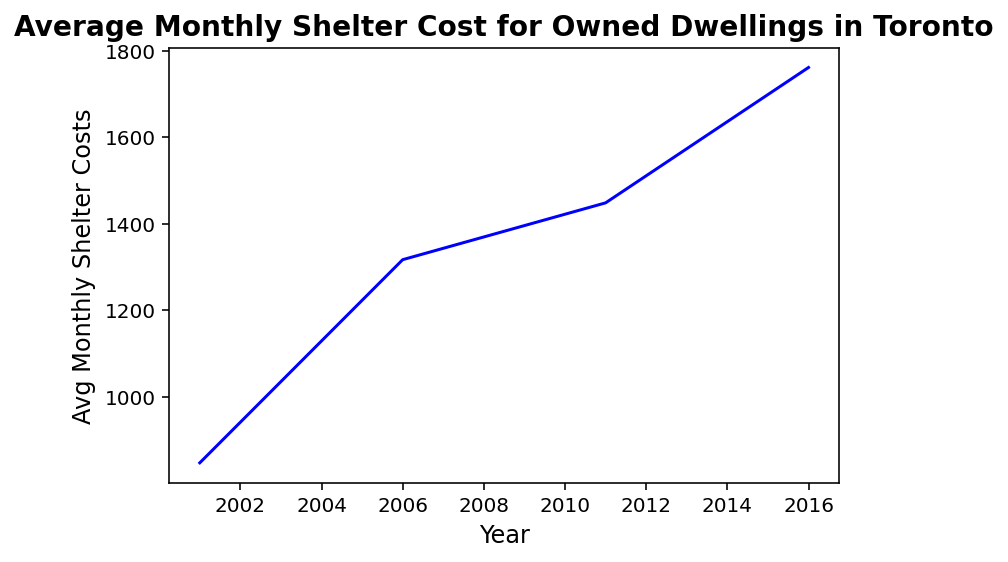
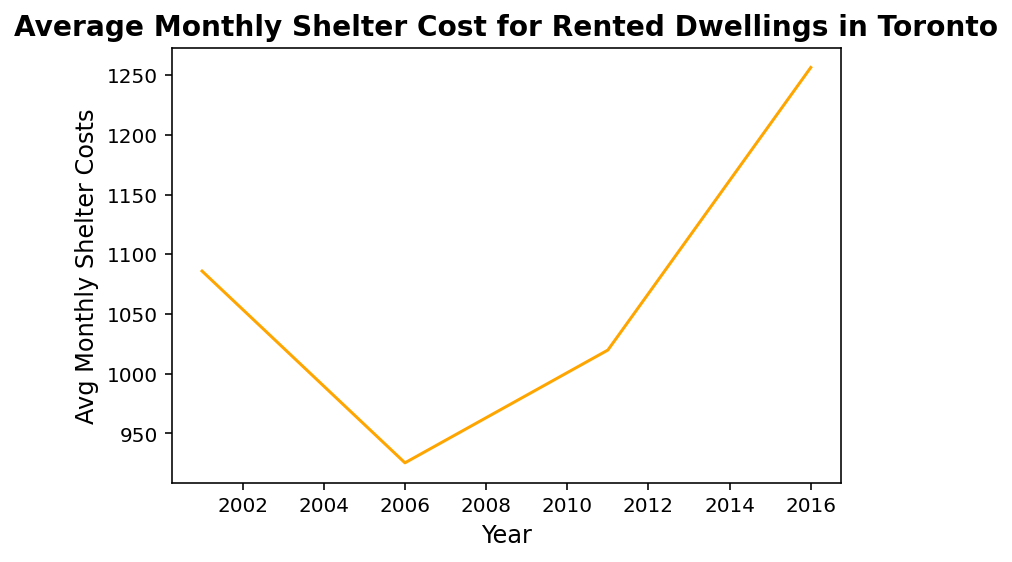

In [326]:
dashboard.servable()

# Debugging

Note: Some of the Plotly express plots may not render in the notebook through the panel functions.

However, you can test each plot by uncommenting the following code

In [219]:
# neighbourhood_map().show()

In [220]:
# # Bar chart for 2001
# create_bar_chart(to_data_year.loc[2001], "Dwelling Types in Toronto in 2001", "2001", "Dwelling Type Units", "red")

In [221]:
# # Bar chart for 2006
# create_bar_chart(to_data_year.loc[2006], "Dwelling Types in Toronto in 2006", "2006", "Dwelling Type Units", "blue")

In [222]:
# # Bar chart for 2011
# create_bar_chart(to_data_year.loc[2011], "Dwelling Types in Toronto in 2011", "2011", "Dwelling Type Units", "orange")

In [223]:
# # Bar chart for 2016
# create_bar_chart(to_data_year.loc[2016], "Dwelling Types in Toronto in 2016", "2016", "Dwelling Type Units", "magenta")

In [231]:
# # Line chart for owned dwellings
# create_line_chart(avg_shelter_costs["shelter_costs_owned"], "Average Monthly Shelter Cost for Owned Dwellings in Toronto", "Year", "Avg Monthly Shelter Costs", "blue")

In [232]:
# # Line chart for rented dwellings
# create_line_chart(avg_shelter_costs["shelter_costs_rented"], "Average Monthly Shelter Cost for Rented Dwellings in Toronto", "Year", "Avg Monthly Shelter Costs", "orange")

In [292]:
# average_house_value()

In [234]:
# average_value_by_neighbourhood()

In [235]:
# number_dwelling_types()

In [236]:
# average_house_value_snapshot()

In [237]:
# top_most_expensive_neighbourhoods()

In [328]:
# sunburts_cost_analysis()